# Hands-On Moving Average Model
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Ohtar10/icesi-advanced-dl/blob/main/Unidad%201%20-%20Time%20Series/moving-average-model.ipynb)

En este notebook se hará una simulación de un proceso de Moving Average para el cual generaremos un conjungo de datos sintético. Como nosotros controlamos la generación de estos datos, va a ser muy fácil determinar si el modelo que obtuvimos si se asemeja a lo que originalmente hemos modelado.

## Simulación de un MA(2)
Vamos a simular in proceso que obedece a los siguientes parámetros:
$$ y_t = 0.63Z_{t-1} + 0.48Z_{t-2}$$

In [4]:
import pkg_resources

installed_packages = [package.key for package in pkg_resources.working_set]
IN_COLAB = 'google-colab' in installed_packages

In [5]:
!test '{IN_COLAB}' = 'True' && wget https://github.com/Ohtar10/icesi-advanced-dl/raw/main/Unidad%201%20-%20Time%20Series/requirements.txt  && pip install -r requirements.txt

Empezamos por generar la serie según los parámetros que hemos definido anteriormente.

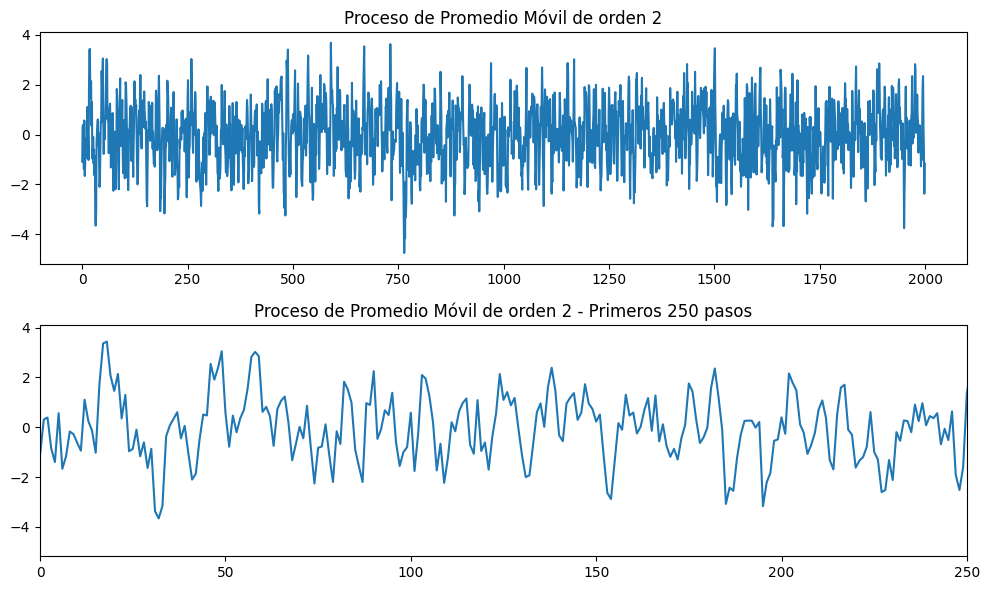

In [24]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
import numpy as np

# Seed para resultados reproducibles
np.random.seed(123)

# El array arranca con 1 ya que este es el coeficiente de la constante no paramétrica
ma2 = np.array([1, 0.63, 0.48])

# Esta variable hace referencia al componente autoregresivo, del cual hablaremos en futuras lecciones
# por ahora, lo definimos sin coeficientes (salvo por la constante) para simular solamente la parte de promedio móvil
ar2 = np.array([1, 0, 0])

# generamos la serie según los parámetros que hemos definido
ma2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=2000)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(ma2_process)
ax1.set_title("Proceso de Promedio Móvil de orden 2")

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(ma2_process)
ax2.set_xlim(0, 250)
ax2.set_title("Proceso de Promedio Móvil de orden 2 - Primeros 250 pasos")

plt.tight_layout()
plt.show()

A diferencia de la serie que vimos en la lección pasada, esta serie no parece seguir una tendencia, parece como si fuera aleatoria. Hay una razón detrás de esto que explicaremos más adelante.

Por lo pronto, podemos proceder a graficar la autocorrelación, con la que podrémos estimar el orden del modelo, el cual debería corresponder al definido en la simulación.

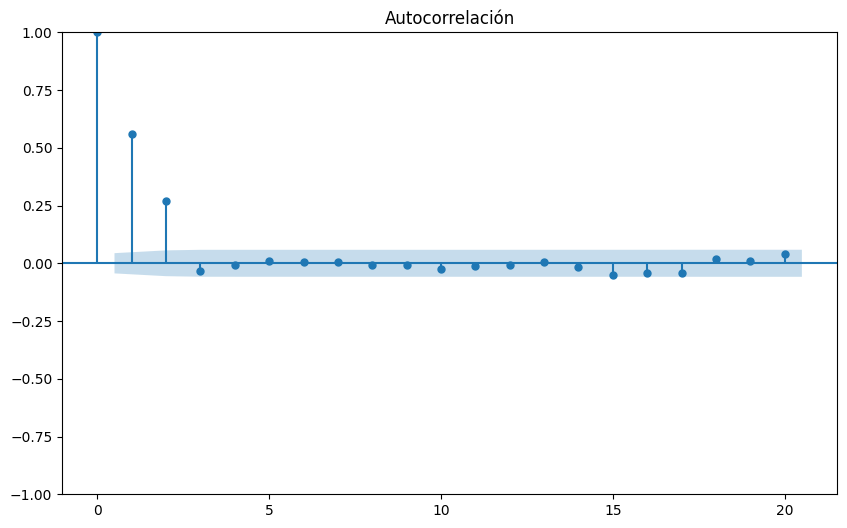

In [27]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
plot_acf(ma2_process, lags=20, title="Autocorrelación", ax=ax)
plt.show()

In [40]:
history = ma2_process[:-500]
ma_model = ARIMA(history, order=(0, 0, 2), enforce_stationarity=False).fit()

print(ma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1500
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -2082.759
Date:                Sat, 20 Jan 2024   AIC                           4173.518
Time:                        16:46:06   BIC                           4194.763
Sample:                             0   HQIC                          4181.433
                               - 1500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0144      0.054     -0.265      0.791      -0.121       0.092
ma.L1          0.6467      0.024     27.056      0.000       0.600       0.694
ma.L2          0.4992      0.023     21.445      0.0

In [84]:
forecast_size = 2
history = ma2_process[:-forecast_size]
test = ma2_process[-forecast_size:]
preds = []
for t in range(len(test)):
    model = ARIMA(history, order=(0, 0, 2), enforce_stationarity=False).fit()
    forecast = model.forecast(1)
    preds.append(forecast)
    history = np.append(history, forecast)


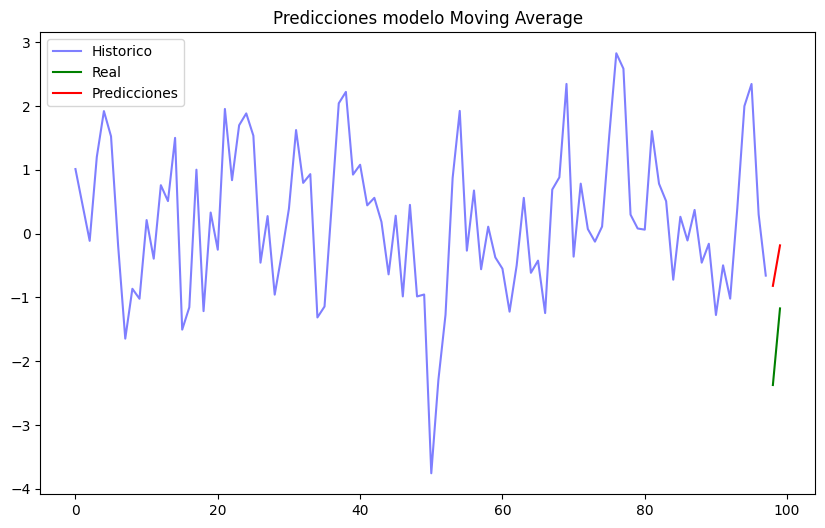

In [85]:
ground_truth = ma2_process[-100:-forecast_size]
forecast_range = np.arange(len(ground_truth), len(ground_truth) + forecast_size)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(ground_truth, color='blue', alpha=0.5, label="Historico")
ax.plot(forecast_range, test, color='green', label="Real")
ax.plot(forecast_range, preds, color='red', label='Predicciones')
plt.title("Predicciones modelo Moving Average")
plt.legend()
plt.show()